<a href="https://colab.research.google.com/github/raulbenitez/ZUMAIN_course/blob/main/ZUMAIN_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from osgeo import gdal
import sys
import numpy as np

hdr_path = '/content/drive/MyDrive/DEEP FOREST ZUMAIN/afectada/raw_25000_rf_or'
img = gdal.Open(hdr_path) 

print('Number of channels: {}'.format(img.RasterCount))
print(' Size of images is {} x {}'.format(img.GetRasterBand(1).ReadAsArray().shape[0],img.GetRasterBand(1).ReadAsArray().shape[1]))

Number of channels: 272
 Size of images is 1332 x 1198


Generate volume


In [5]:
import matplotlib.pyplot as plt
import skimage as sk
from skimage import io
from os import mkdir
import os.path
from os import path

# Crear la carpeta para poner los PNGs:
if os.path.exists(hdr_path+'_PNGS/')==False:
    mkdir(hdr_path+'_PNGS/')


NROWS = img.GetRasterBand(1).ReadAsArray().shape[0]
NCOLS = img.GetRasterBand(1).ReadAsArray().shape[1]
NCHANNELS = img.RasterCount

# Generar el volumen, crear figura y grabar el png: 
VOL = np.zeros((NROWS,NCOLS,NCHANNELS))

for band in range(img.RasterCount):
    band += 1
    print("[ GETTING BAND ]: ", band)
    srcband = img.GetRasterBand(band)
    inputArray = np.array(img.GetRasterBand(band).ReadAsArray()) 
    VOL[:,:,band-1] = inputArray
    fig = plt.figure(figsize=(10,10))
    io.imshow(inputArray,cmap='gray')
    plt.close()

[ GETTING BAND ]:  1
[ GETTING BAND ]:  2


/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


[ GETTING BAND ]:  3
[ GETTING BAND ]:  4
[ GETTING BAND ]:  5
[ GETTING BAND ]:  6
[ GETTING BAND ]:  7
[ GETTING BAND ]:  8
[ GETTING BAND ]:  9
[ GETTING BAND ]:  10
[ GETTING BAND ]:  11
[ GETTING BAND ]:  12
[ GETTING BAND ]:  13
[ GETTING BAND ]:  14
[ GETTING BAND ]:  15
[ GETTING BAND ]:  16
[ GETTING BAND ]:  17
[ GETTING BAND ]:  18
[ GETTING BAND ]:  19
[ GETTING BAND ]:  20
[ GETTING BAND ]:  21
[ GETTING BAND ]:  22
[ GETTING BAND ]:  23
[ GETTING BAND ]:  24
[ GETTING BAND ]:  25
[ GETTING BAND ]:  26
[ GETTING BAND ]:  27
[ GETTING BAND ]:  28
[ GETTING BAND ]:  29
[ GETTING BAND ]:  30
[ GETTING BAND ]:  31
[ GETTING BAND ]:  32
[ GETTING BAND ]:  33
[ GETTING BAND ]:  34
[ GETTING BAND ]:  35
[ GETTING BAND ]:  36
[ GETTING BAND ]:  37
[ GETTING BAND ]:  38
[ GETTING BAND ]:  39
[ GETTING BAND ]:  40
[ GETTING BAND ]:  41
[ GETTING BAND ]:  42
[ GETTING BAND ]:  43
[ GETTING BAND ]:  44
[ GETTING BAND ]:  45
[ GETTING BAND ]:  46
[ GETTING BAND ]:  47
[ GETTING BAND ]:

Visualize images in some frequency bands/channels

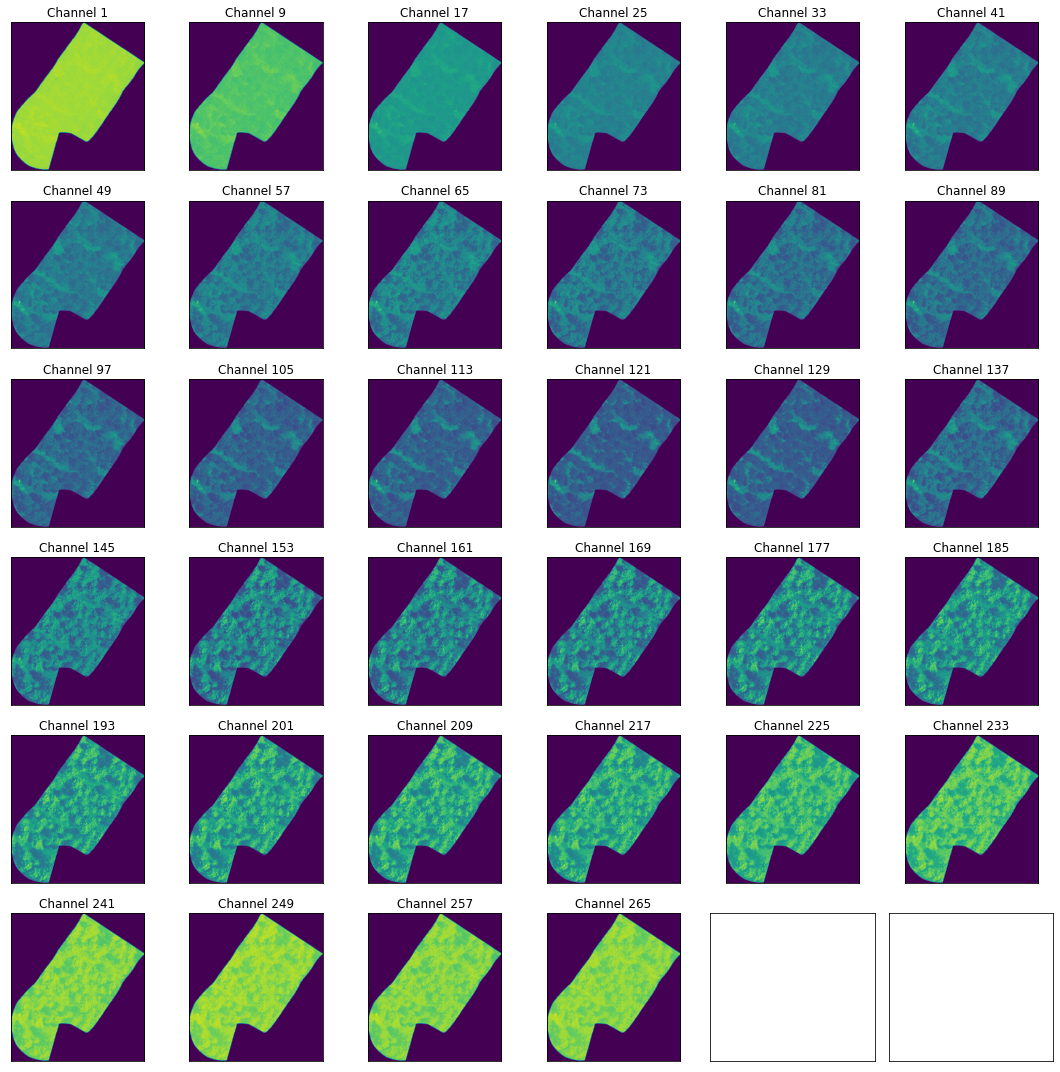

In [8]:
channels = np.arange(1,img.RasterCount,8)

fig, axs = plt.subplots(nrows=6, ncols=6, figsize=(15, 15),subplot_kw={'xticks': [], 'yticks': []})

for ax, channel in zip(axs.flat, channels):
    ax.imshow(VOL[:,:,channel], cmap='viridis')
    ax.set_title('Channel {}'.format(channel))
plt.tight_layout()
plt.show()

Multispectral clustering

In [9]:
from sklearn.cluster import KMeans

VOLR = VOL[:,:,30:250:10] # choose some relevant frequency bands
x = VOLR.reshape(VOLR.shape[0]*VOL.shape[1],VOLR.shape[2])
# Fit a Kmeans clustering model with two clusters using training image:
kmeans = KMeans(n_clusters=5, random_state=0).fit(x)
x_kmeans = kmeans.predict(x)
I_kmeans_MS = np.array(x_kmeans).reshape(VOL.shape[0],VOL.shape[1]).astype(np.uint8)# Shape back result as image 



RGB image and segmentation

In [15]:
def plot_comparison(original, filtered):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 10), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title('segmented')
    ax2.axis('off')
    
IRGB = np.zeros((VOL.shape[0],VOL.shape[1],3))

IR = VOL[:,:,123]
IG = VOL[:,:,65]
IB = VOL[:,:,38]

IRGB[:,:,0] = IR
IRGB[:,:,1] = IG
IRGB[:,:,2] = IB



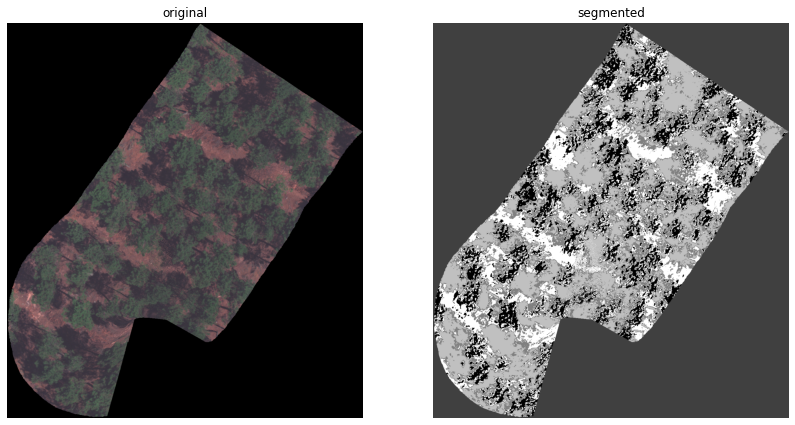

In [16]:
from skimage.util import img_as_ubyte,img_as_float
IRGB = img_as_float(IRGB)/IRGB.max()

plot_comparison(IRGB,I_kmeans_MS)

Visualize profiles


In [19]:
freq = np.array([398.061
,400.29
,402.519
,404.748
,406.977
,409.206
,411.435
,413.665
,415.894
,418.123
,420.352
,422.581
,424.81
,427.039
,429.268
,431.497
,433.726
,435.955
,438.184
,440.413
,442.643
,444.872
,447.101
,449.33
,451.559
,453.788
,456.017
,458.246
,460.475
,462.704
,464.933
,467.162
,469.391
,471.621
,473.85
,476.079
,478.308
,480.537
,482.766
,484.995
,487.224
,489.453
,491.682
,493.911
,496.14
,498.37
,500.599
,502.828
,505.057
,507.286
,509.515
,511.744
,513.973
,516.202
,518.431
,520.66
,522.889
,525.118
,527.348
,529.577
,531.806
,534.035
,536.264
,538.493
,540.722
,542.951
,545.18
,547.409
,549.638
,551.867
,554.096
,556.326
,558.555
,560.784
,563.013
,565.242
,567.471
,569.7
,571.929
,574.158
,576.387
,578.616
,580.845
,583.074
,585.304
,587.533
,589.762
,591.991
,594.22
,596.449
,598.678
,600.907
,603.136
,605.365
,607.594
,609.823
,612.052
,614.282
,616.511
,618.74
,620.969
,623.198
,625.427
,627.656
,629.885
,632.114
,634.343
,636.572
,638.801
,641.031
,643.26
,645.489
,647.718
,649.947
,652.176
,654.405
,656.634
,658.863
,661.092
,663.321
,665.55
,667.779
,670.009
,672.238
,674.467
,676.696
,678.925
,681.154
,683.383
,685.612
,687.841
,690.07
,692.299
,694.528
,696.757
,698.987
,701.216
,703.445
,705.674
,707.903
,710.132
,712.361
,714.59
,716.819
,719.048
,721.277
,723.506
,725.735
,727.965
,730.194
,732.423
,734.652
,736.881
,739.11
,741.339
,743.568
,745.797
,748.026
,750.255
,752.484
,754.714
,756.943
,759.172
,761.401
,763.63
,765.859
,768.088
,770.317
,772.546
,774.775
,777.004
,779.233
,781.462
,783.692
,785.921
,788.15
,790.379
,792.608
,794.837
,797.066
,799.295
,801.524
,803.753
,805.982
,808.211
,810.44
,812.67
,814.899
,817.128
,819.357
,821.586
,823.815
,826.044
,828.273
,830.502
,832.731
,834.96
,837.189
,839.418
,841.648
,843.877
,846.106
,848.335
,850.564
,852.793
,855.022
,857.251
,859.48
,861.709
,863.938
,866.167
,868.396
,870.626
,872.855
,875.084
,877.313
,879.542
,881.771
,884
,886.229
,888.458
,890.687
,892.916
,895.145
,897.375
,899.604
,901.833
,904.062
,906.291
,908.52
,910.749
,912.978
,915.207
,917.436
,919.665
,921.894
,924.123
,926.353
,928.582
,930.811
,933.04
,935.269
,937.498
,939.727
,941.956
,944.185
,946.414
,948.643
,950.872
,953.101
,955.331
,957.56
,959.789
,962.018
,964.247
,966.476
,968.705
,970.934
,973.163
,975.392
,977.621
,979.85
,982.079
,984.309
,986.538
,988.767
,990.996
,993.225
,995.454
,997.683
,999.912
,1002.14])


In [23]:
df = freq[16]-freq[15]
              
            

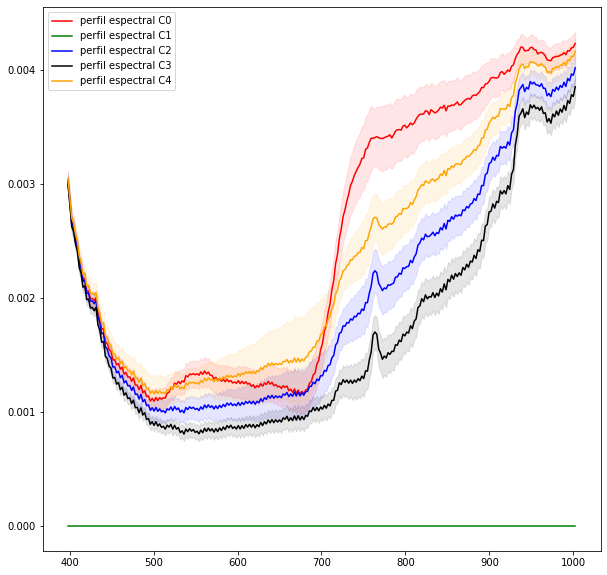

In [24]:
Spec_C0 = VOL[I_kmeans_MS==0,:].transpose().mean(axis=1)
Spec_C1 = VOL[I_kmeans_MS==1,:].transpose().mean(axis=1)
Spec_C2 = VOL[I_kmeans_MS==2,:].transpose().mean(axis=1)
Spec_C3 = VOL[I_kmeans_MS==3,:].transpose().mean(axis=1)
Spec_C4 = VOL[I_kmeans_MS==4,:].transpose().mean(axis=1)
Spec_C0_sd = VOL[I_kmeans_MS==0,:].transpose().std(axis=1)
Spec_C1_sd = VOL[I_kmeans_MS==1,:].transpose().std(axis=1)
Spec_C2_sd = VOL[I_kmeans_MS==2,:].transpose().std(axis=1)
Spec_C3_sd = VOL[I_kmeans_MS==3,:].transpose().std(axis=1)
Spec_C4_sd = VOL[I_kmeans_MS==4,:].transpose().std(axis=1)


fig = plt.figure(figsize=(10, 10))

plt.plot(freq,Spec_C0,'r')
plt.fill_between(freq,Spec_C0 - Spec_C0_sd, Spec_C0 + Spec_C0_sd,color='r', alpha=0.1)
plt.plot(freq,Spec_C1,'g')
plt.fill_between(freq,Spec_C1 - Spec_C1_sd, Spec_C1 + Spec_C1_sd,color='g', alpha=0.1)
plt.plot(freq,Spec_C2,'b')
plt.fill_between(freq,Spec_C2 - Spec_C2_sd, Spec_C2 + Spec_C2_sd,color='b', alpha=0.1)
plt.plot(freq,Spec_C3,'k')
plt.fill_between(freq,Spec_C3 - Spec_C3_sd, Spec_C3 + Spec_C3_sd,color='k', alpha=0.1)
plt.plot(freq,Spec_C4,'orange')
plt.fill_between(freq,Spec_C4 - Spec_C4_sd, Spec_C4 + Spec_C4_sd,color='orange', alpha=0.1)
plt.legend(['perfil espectral C0','perfil espectral C1','perfil espectral C2','perfil espectral C3','perfil espectral C4'])

plt.show()